In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
df = pd.read_csv(r"data_understanding_output.csv",skipinitialspace=True)

In [7]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

word    object
PoS     object
dtype: object

In [8]:
df_train = df.drop(['word','PoS', 'polysemy', 'length', 'number_of_meanings'], axis=1)
df_train.dtypes

arousal                          float64
valence                          float64
dominance                        float64
concreteness                     float64
imageability                     float64
familiarity                      float64
aoa                              float64
semsize                          float64
gender                           float64
log_freq                         float64
avg_variance_between_meanings    float64
sentiment                        float64
dtype: object

In [9]:
df_train.columns

Index(['arousal', 'valence', 'dominance', 'concreteness', 'imageability',
       'familiarity', 'aoa', 'semsize', 'gender', 'log_freq',
       'avg_variance_between_meanings', 'sentiment'],
      dtype='object')

In [10]:
from sklearn import preprocessing

In [11]:
import warnings
warnings.filterwarnings('ignore')


In [12]:
cols = [col for col in df_train.columns]
X = df[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

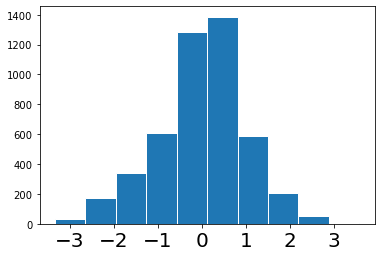

In [13]:
plt.hist(X_scal[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

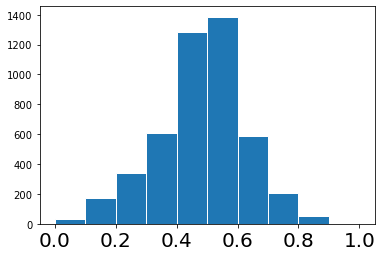

In [14]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

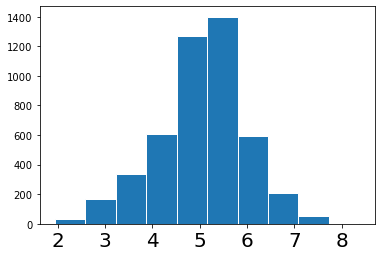

In [15]:
plt.hist(X[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [16]:
kmeans = KMeans( n_clusters=5, n_init=20, max_iter=100 )
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=5, n_init=20)

In [17]:
kmeans.labels_

array([0, 0, 1, ..., 1, 4, 1], dtype=int32)

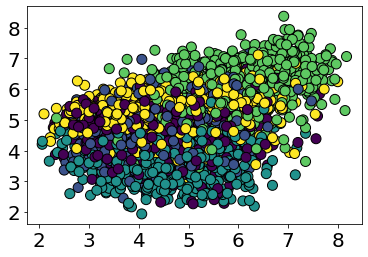

In [18]:
plt.scatter( X[:,0], X[:,2], s=100, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [19]:
kmeans.cluster_centers_

array([[0.36181316, 0.46442384, 0.44738671, 0.73825122, 0.72061216,
        0.57081994, 0.59956909, 0.46240245, 0.58989477, 0.45142059,
        0.02131329, 0.49552239],
       [0.37263053, 0.48840662, 0.45512564, 0.33469673, 0.29674705,
        0.52426777, 0.73643136, 0.5108935 , 0.53422357, 0.45342188,
        0.00796146, 0.50058548],
       [0.42207228, 0.21080199, 0.29621318, 0.32925718, 0.40974754,
        0.71504655, 0.5176015 , 0.56667517, 0.56241631, 0.46886318,
        0.00602356, 0.22981878],
       [0.58030531, 0.74696643, 0.61361883, 0.32738988, 0.39465089,
        0.78209746, 0.48235608, 0.62190038, 0.45040119, 0.60352201,
        0.01881149, 0.65752033],
       [0.40274568, 0.60617346, 0.5180422 , 0.8423956 , 0.86997374,
        0.79671088, 0.29230276, 0.38803568, 0.48464045, 0.56250921,
        0.04567381, 0.5036526 ]])

In [20]:
centers = kmeans.cluster_centers_

In [21]:
centers = scaler.inverse_transform(centers)

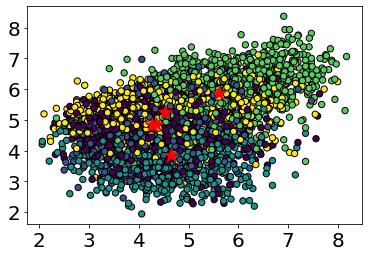

In [22]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], c='red', marker='*', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

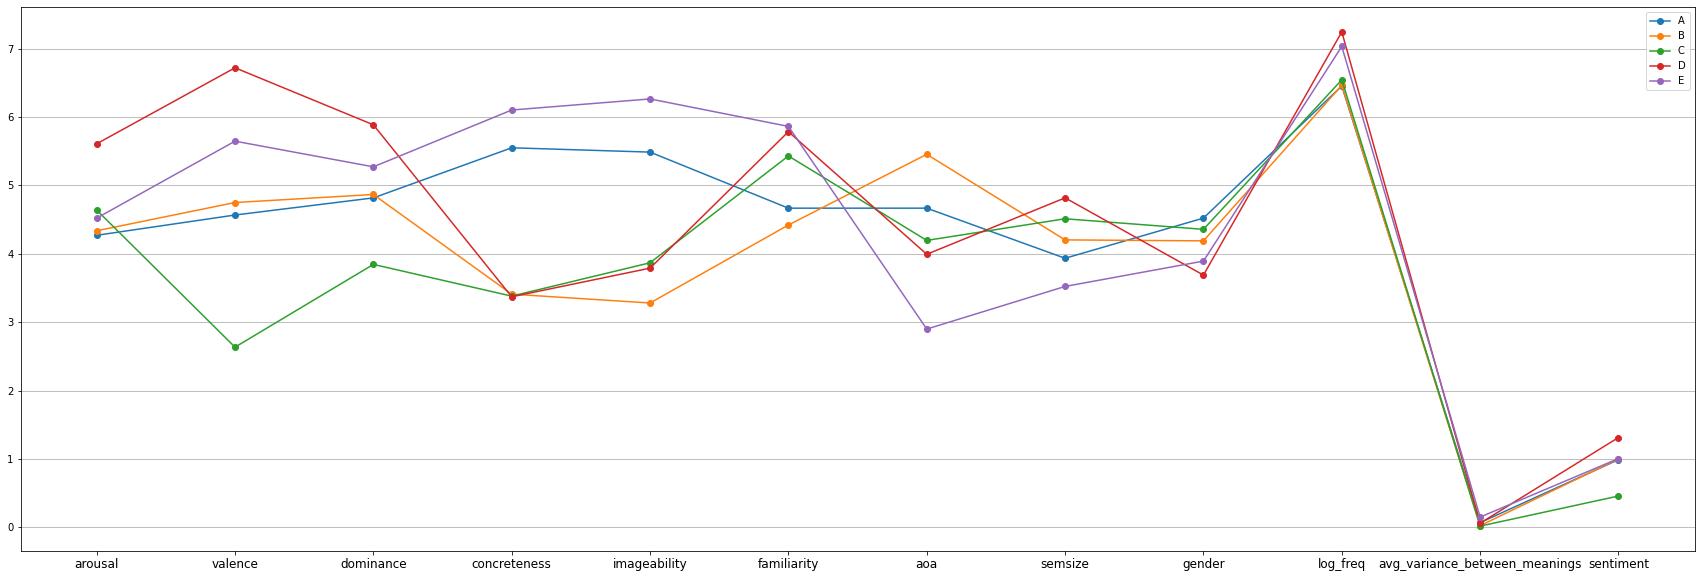

In [23]:
plt.figure(figsize=(30, 10))

clust_name = ['A', 'B', 'C','D','E']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=12)
plt.yticks(fontsize=10)

plt.legend(fontsize=10, loc='best')
plt.grid(axis='y')

[]

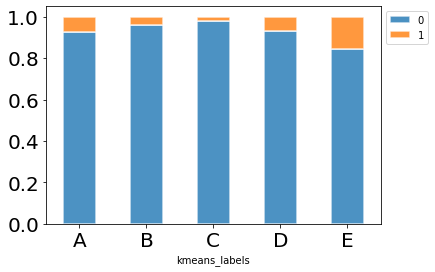

In [24]:
df_train['kmeans_labels'] = kmeans.labels_

bar_pl = df['polysemy'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [25]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1005,  854,  607,  984, 1232]))

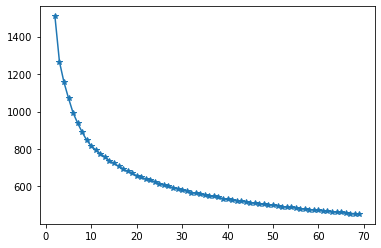

In [26]:
# kmeans
sse_list = list()
max_k = 70
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, )
    kmeans.fit(X_minmax)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list, marker='*')
plt.show()

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

In [ ]:
train_data = df_train.values

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('centers', kmeans.cluster_centers_)
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))



In [ ]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

In [ ]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

In [ ]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [ ]:
df_clusters[df_clusters['Labels']==3].describe()

In [ ]:
dbscan = DBSCAN( eps=0.3, min_samples=5)
dbscan.fit(X_minmax)

In [ ]:
dbscan.labels_

In [ ]:
# density based clustering
print ('dbscan')

dbscan = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
dbscan.fit(X_minmax)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

In [ ]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
#hierarchical
data_dist = pdist(X_minmax, metric='euclidean')
data_link = linkage(data_dist, method='complete')

res = dendrogram(data_link, truncate_mode='lastp')

In [ ]:
hier = AgglomerativeClustering(n_clusters=, affinity='euclidean', linkage='single')
hier.fit(X_minmax)

In [ ]:
hier.labels_

In [ ]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [ ]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [ ]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

In [ ]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

In [ ]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print( 'labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram